In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [2]:
%cd drive/My Drive

/content/drive/My Drive


In [5]:
# !git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 14163 (delta 5), reused 12 (delta 5), pack-reused 14148
Receiving objects: 100% (14163/14163), 12.75 MiB | 7.77 MiB/s, done.
Resolving deltas: 100% (9624/9624), done.
Checking out files: 100% (2014/2014), done.


In [7]:
%cd darknet

[Errno 20] Not a directory: 'darknet'
/content/drive/My Drive/darknet


In [10]:
!ls

3rdparty		 darknet		 net_cam_v3.sh
backup			 darknet53.conv.74	 net_cam_v4.sh
bad_label.list		 DarknetConfig.cmake.in  obj
bad.list		 darknet_images.py	 predictions.jpg
build			 darknet.py		 README.md
build.ps1		 darknet_video.py	 results
build.sh		 data			 scripts
cfg			 image_yolov3.sh	 src
chart.png		 image_yolov4.sh	 video_yolov3.sh
chart_yolov3-custom.png  include		 video_yolov4.sh
cmake			 json_mjpeg_streams.sh	 yolov3.weights
CMakeLists.txt		 LICENSE
custom_data		 Makefile


In [25]:
!sudo gedit ~/.bashrc

sudo: gedit: command not found


In [38]:
!chmod +x *.sh

In [39]:
!make

chmod +x *.sh


In [36]:
!export DISPLAY=0:0

In [9]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-08-05 17:45:29--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   218KB/s    in 10m 42s 

2020-08-05 17:56:12 (247 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [12]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-08-05 18:00:26--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   442KB/s    in 14m 14s 

2020-08-05 18:14:42 (284 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [5]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [9]:
!chmod +x linux_mark.sh
!./linux_mark.sh

chmod: cannot access 'linux_mark.sh': No such file or directory
/bin/bash: ./linux_mark.sh: No such file or directory


/bin/bash: ./darknet: Permission denied


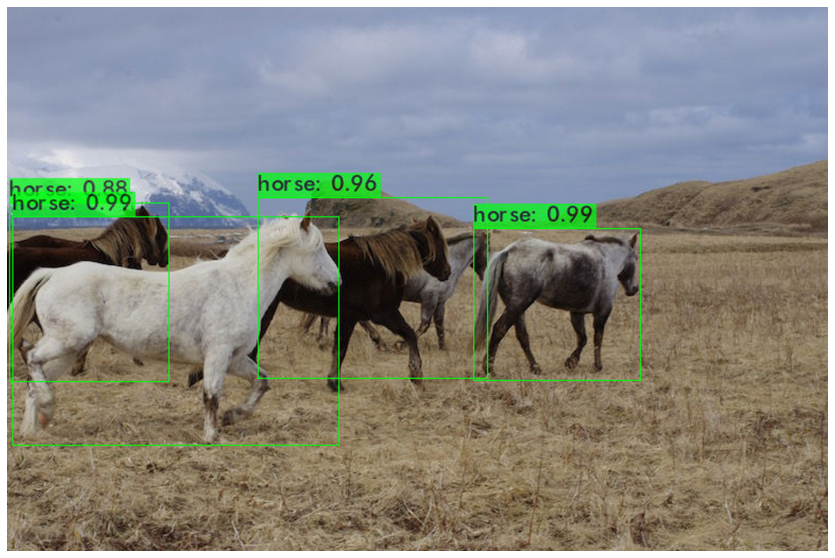

In [6]:
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/horses.jpg

imShow('predictions.jpg')

In [7]:
!./darknet detector train custom_data/detector.data cfg/yolov3-custom.cfg darknet53.conv.74 -gpu 0 -mjpeg_port 8090 -map -dont_show

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.619557, GIOU: 0.591951), Class: 0.913354, Obj: 0.479073, No Obj: 0.002610, .5R: 0.687500, .75R: 0.375000, count: 16, class_loss = 2.824124, iou_loss = 3.516146, total_loss = 6.340271 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000014, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000056, iou_loss = 0.000000, total_loss = 0.000056 
 total_bbox = 263257, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.761322, GIOU: 0.754936), Class: 0.992031, Obj: 0.974917, No Obj: 0.007107, .5R: 1.000000, .75R: 0.600000, count: 5, class_loss = 0.134606, iou_loss = 0.230946, total_loss = 0.365552 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.727875, GIOU: 0.718155), Class: 0.965222, Obj: 0.621911, No Obj: 0.004197, .5R

In [1]:
!./darknet detector test custom_data/detector.data cfg/yolov3-custom.cfg backup/yolov3-custom_last.weights custom_data/image/사과_15.jpg -dont-show

imShow('predictions.jpg')

/bin/bash: ./darknet: No such file or directory


NameError: ignored

In [19]:
!./darknet detector map custom_data/detector.data cfg/yolov3-custom.cfg backup/yolov3-custom_last.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 